# Pre-setup

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

In [2]:
df = pd.read_csv('../data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Based on dataset description, V1 -> V28 are values after applied PCA on real data, left only Time, Amount and Class. For our work, let separate this file into `train` and `test` file, `train` file will be use to do all the PCA, `test` file will be used to act as Kafka data flow.

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.02)
y = df.pop('Class')
for train_index, test_index in sss.split(df, y):
    pass

df = pd.read_csv('../data/creditcard.csv')
test_df = df.iloc[test_index]
train_df = df.iloc[train_index]

test_df.to_csv('../data/test.csv', index=False)
train_df.to_csv('../data/train.csv', index=False)

# EDA

In [1]:
# Basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,121401.0,1.919182,-1.742647,0.775662,-0.260260,-2.179314,0.421375,-1.934811,0.253900,1.537901,...,0.333796,1.337362,0.046490,0.077855,-0.235563,0.014173,0.086364,-0.020096,79.00,0
1,121211.0,1.471557,-0.711308,1.205496,4.400121,-1.205054,1.458609,-1.214661,0.475588,0.974728,...,0.182216,0.686270,0.056713,-0.058427,-0.369141,0.075563,0.064406,0.006887,154.11,0
2,81324.0,-2.373043,2.563438,0.225781,2.274042,-1.008791,-0.378413,-0.474627,1.555529,-2.365868,...,-0.098723,-1.084756,0.388042,0.463112,-0.517477,-0.517094,-0.907652,-0.148523,24.18,0
3,23788.0,-1.333887,0.252836,1.633499,0.426479,0.008796,0.162723,0.688786,0.043183,1.018169,...,-0.256502,-0.212222,-0.032839,0.209957,-0.158958,0.195223,0.295101,0.112018,169.45,0
4,94820.0,1.840982,0.463263,-0.474705,4.300513,0.395571,0.130230,0.149732,-0.197216,0.748078,...,-0.060644,0.347114,-0.006076,-0.038707,0.276840,0.149766,-0.052950,-0.057377,37.17,0


In [3]:
# Good No Null Values!
df.isnull().sum().max()

np.int64(0)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', df['Class'].value_counts()[0] ,round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', df['Class'].value_counts()[1], round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 278628 99.83 % of the dataset
Frauds 482 0.17 % of the dataset


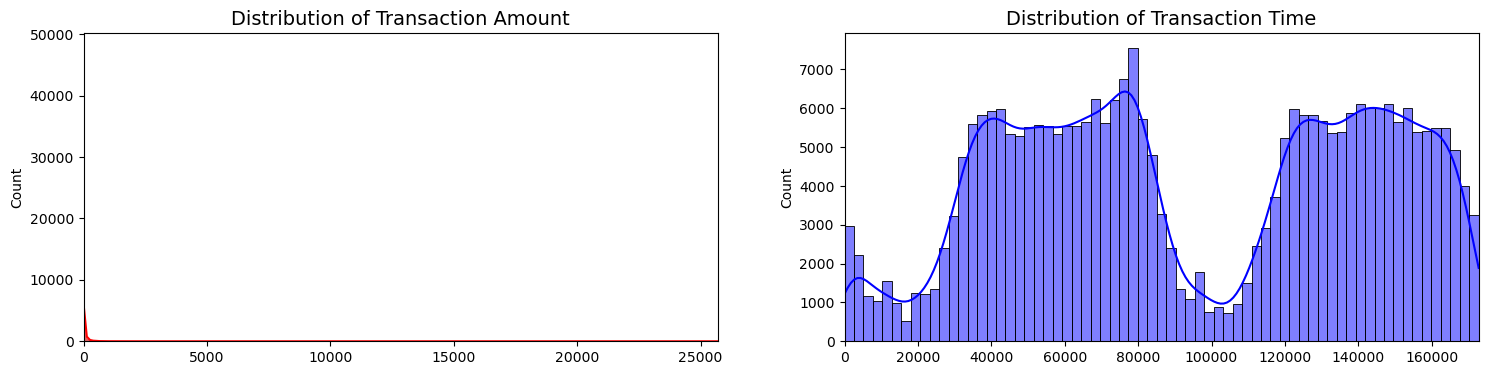

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

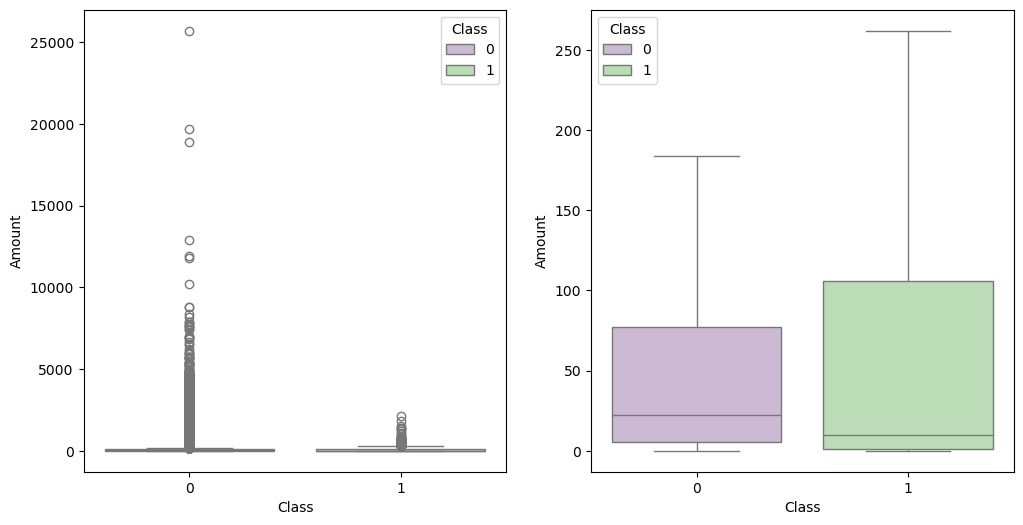

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [8]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    278628.000000
mean         88.188805
std         249.568272
min           0.000000
25%           5.650000
50%          22.000000
75%          77.000000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
class_1.describe()

count     482.000000
mean      123.570332
std       258.941864
min         0.000000
25%         1.000000
50%         9.555000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

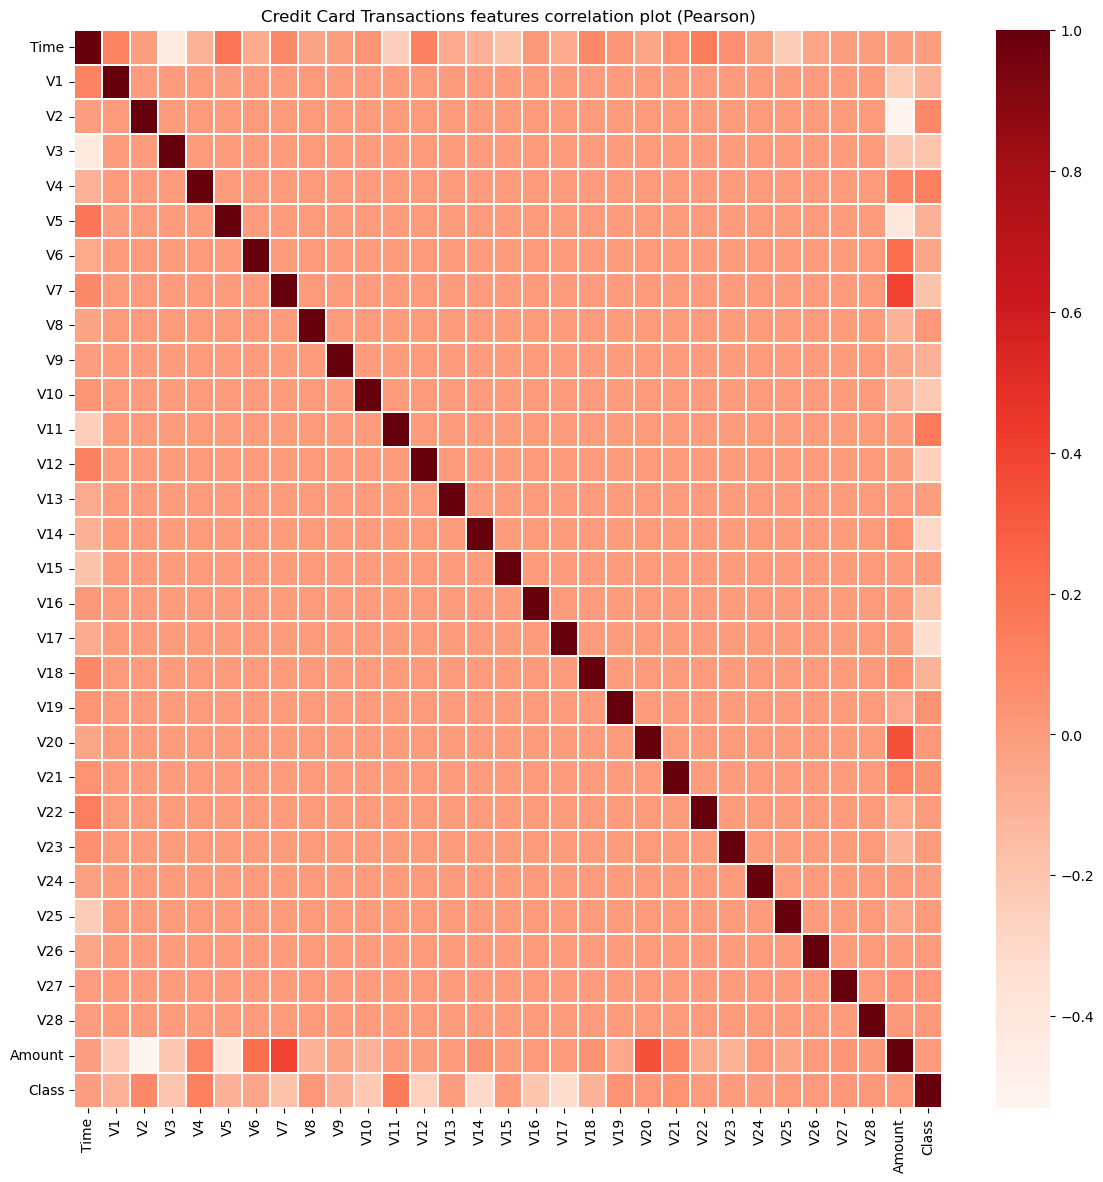

In [10]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

V2, V4, V11 and V17 look like it could somewhat help on detection

## Predictive models

In [11]:
# Let's define the predictor features and the target features.

target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [15]:
import warnings
warnings.filterwarnings('ignore')

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

X = df[predictors].values
y = df[target].values

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVC", SVC(probability=True)),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier())
]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {name: {"accuracy": [], "precision": [], "recall": [], "f1": [], "roc_auc": []} for name, _ in models}

# Indices of 'Time' and 'Amount' in predictors
time_idx = predictors.index('Time')
amount_idx = predictors.index('Amount')

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n=== Fold {fold} ===")
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Scale 'Time' and 'Amount'
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    X_train_scaled[:, [time_idx, amount_idx]] = scaler.fit_transform(X_train[:, [time_idx, amount_idx]])
    X_val_scaled[:, [time_idx, amount_idx]] = scaler.transform(X_val[:, [time_idx, amount_idx]])
    
    # Apply RandomUnderSampler only to the training data
    rus = RandomUnderSampler(random_state=42)
    X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
    
    for name, model in models:
        print(f"Training {name} ...", end=" ")
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:,1] if hasattr(model, "predict_proba") else None
        results[name]["accuracy"].append(accuracy_score(y_val, y_pred))
        results[name]["precision"].append(precision_score(y_val, y_pred, zero_division=0))
        results[name]["recall"].append(recall_score(y_val, y_pred, zero_division=0))
        results[name]["f1"].append(f1_score(y_val, y_pred, zero_division=0))
        if y_proba is not None:
            results[name]["roc_auc"].append(roc_auc_score(y_val, y_proba))
        else:
            results[name]["roc_auc"].append(float('nan'))
        print("Done.")

# Print average scores for each model
for name in results:
    print(f"\n{name}:")
    for metric in results[name]:
        avg = np.nanmean(results[name][metric])
        print(f"  {metric}: {avg:.4f}")


=== Fold 1 ===
Training Logistic Regression ... Done.
Training SVC ... Done.
Training KNN ... Done.
Training Decision Tree ... Done.
Training Random Forest ... Done.

=== Fold 2 ===
Training Logistic Regression ... Done.
Training SVC ... Done.
Training KNN ... Done.
Training Decision Tree ... Done.
Training Random Forest ... Done.

=== Fold 3 ===
Training Logistic Regression ... Done.
Training SVC ... Done.
Training KNN ... Done.
Training Decision Tree ... Done.
Training Random Forest ... Done.

=== Fold 4 ===
Training Logistic Regression ... Done.
Training SVC ... Done.
Training KNN ... Done.
Training Decision Tree ... Done.
Training Random Forest ... Done.

=== Fold 5 ===
Training Logistic Regression ... Done.
Training SVC ... Done.
Training KNN ... Done.
Training Decision Tree ... Done.
Training Random Forest ... Done.

Logistic Regression:
  accuracy: 0.9618
  precision: 0.0400
  recall: 0.9088
  f1: 0.0766
  roc_auc: 0.9756

SVC:
  accuracy: 0.4876
  precision: 0.0020
  recall: 0

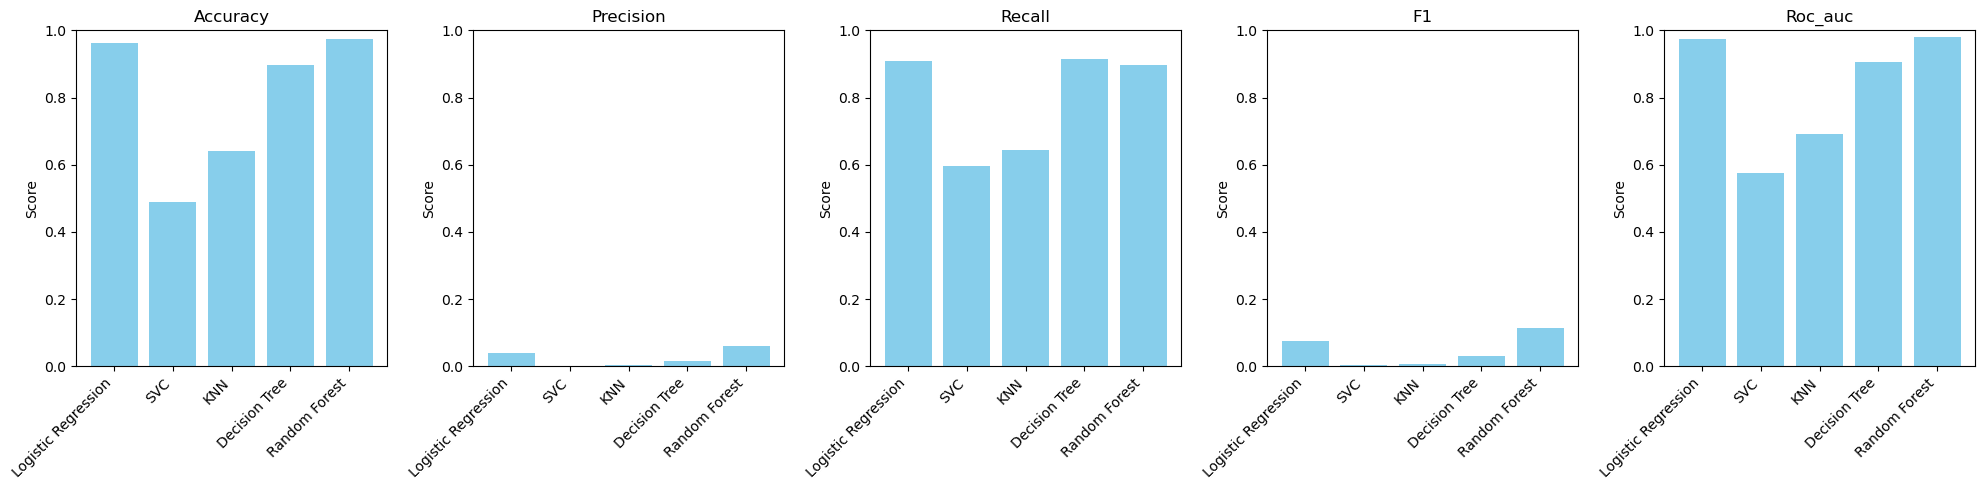

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
model_names = list(results.keys())
avg_scores = {metric: [np.nanmean(results[model][metric]) for model in model_names] for metric in metrics}

# Plotting
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))
for idx, metric in enumerate(metrics):
    axes[idx].bar(model_names, avg_scores[metric], color='skyblue')
    axes[idx].set_title(metric.capitalize())
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xticklabels(model_names, rotation=45, ha='right')
    axes[idx].set_ylabel('Score')
plt.tight_layout()
plt.show()

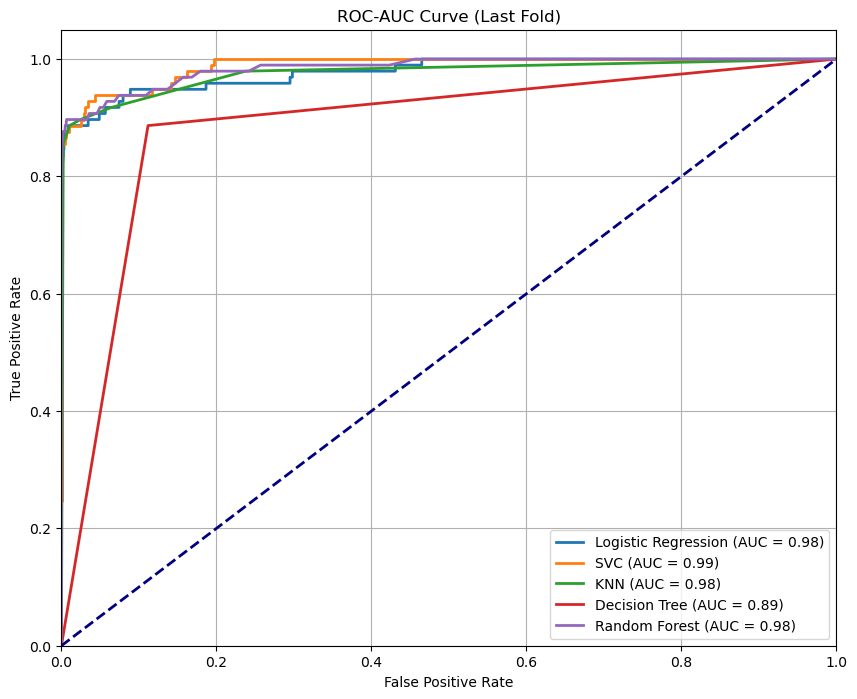

In [17]:
# Plot ROC-AUC curves for each model on the last fold

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Use the last fold for ROC curve plotting
fold = 5  # last fold
X = df[predictors].values
y = df[target].values
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
splits = list(skf.split(X, y))
train_idx, val_idx = splits[fold-1]
X_train, X_val = X[train_idx], X[val_idx]
y_train, y_val = y[train_idx], y[val_idx]

# Scale 'Time' and 'Amount'
scaler = StandardScaler()
time_idx = predictors.index('Time')
amount_idx = predictors.index('Amount')
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_train_scaled[:, [time_idx, amount_idx]] = scaler.fit_transform(X_train[:, [time_idx, amount_idx]])
X_val_scaled[:, [time_idx, amount_idx]] = scaler.transform(X_val[:, [time_idx, amount_idx]])

# Undersample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_scaled, y_train)

for name, model in models:
    model.fit(X_train_res, y_train_res)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_val_scaled)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # scale to [0,1]
    else:
        continue  # skip if no probability or decision_function

    fpr, tpr, _ = roc_curve(y_val, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (Last Fold)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Look like the best one is Random Forest so this would be the main model that we will use to train for our fraud detection system